In [5]:
%pylab inline
#%load_ext memory_profiler
from pomegranate import BayesianNetwork
import seaborn, time
seaborn.set_style('whitegrid')

X = numpy.random.randint(2, size=(2000, 7))
X[:,3] = X[:,1]
X[:,6] = X[:,1]

X[:,0] = X[:,2]

X[:,4] = X[:,5]

model = BayesianNetwork.from_samples(X, algorithm='exact')
print(model.structure)
model.plot()

((), (), (0,), (1,), (), (4,), (3,))


ValueError: must have pygraphviz installed for visualization

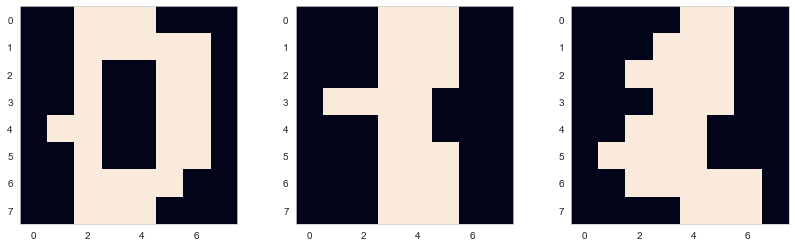

In [6]:
from sklearn.datasets import load_digits

X, y = load_digits(10, True)
X = X > numpy.mean(X)

plt.figure(figsize=(14, 4))
plt.subplot(131)
plt.imshow(X[0].reshape(8, 8), interpolation='nearest')
plt.grid(False)
plt.subplot(132)
plt.imshow(X[1].reshape(8, 8), interpolation='nearest')
plt.grid(False)
plt.subplot(133)
plt.imshow(X[2].reshape(8, 8), interpolation='nearest')
plt.grid(False)

In [7]:
X = X[:,:18]
    
tic = time.time()
model = BayesianNetwork.from_samples(X, algorithm='exact-dp') # << BNSL done here!
t1 = time.time() - tic
p1 = model.log_probability(X).sum()

tic = time.time()
model = BayesianNetwork.from_samples(X, algorithm='exact')
t2 = time.time() - tic
p2 = model.log_probability(X).sum()


print("Shortest Path")
print("Time (s): ", t1)
print("P(D|M): ", p1)
%memit BayesianNetwork.from_samples(X, algorithm='exact-dp')
print()
print("A* Search")
print("Time (s): ", t2)
print("P(D|M): ", p2)
%memit BayesianNetwork.from_samples(X, algorithm='exact')

Shortest Path
Time (s):  159.95974230766296
P(D|M):  -8267.950447476833


UsageError: Line magic function `%memit` not found.
